## Load and Inspect the Data

In [6]:
import pandas as pd

# Load the data
file_path = '/Users/zakariyafarah/Visualization-checkpoint/godisAB_forsaljning.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,Manad,2020,2021
0,1,90000,70000
1,2,160000,110000
2,3,190000,200000
3,4,240000,270000
4,5,130000,180000


## Visualize the Sales Data with Matplotlib

#####  a. Line Plot for the Year 2020

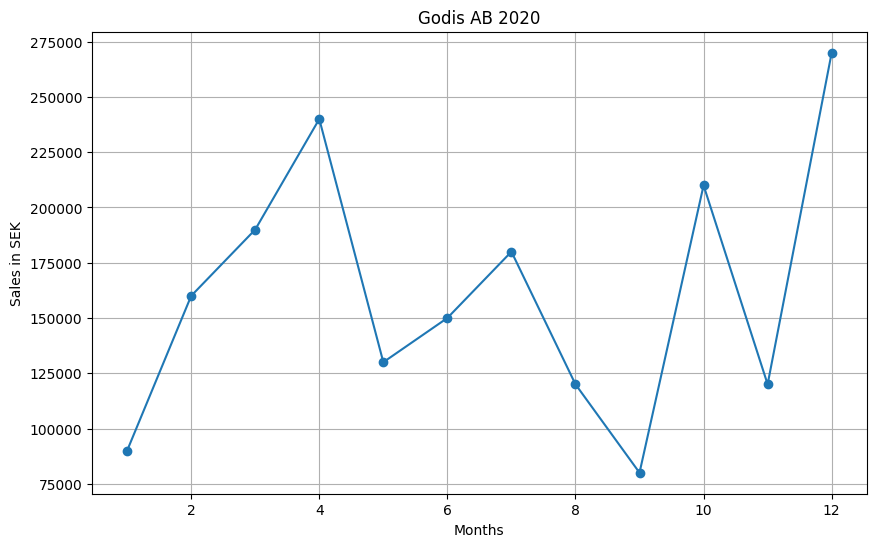

In [7]:
import matplotlib.pyplot as plt

# Line plot for 2020
plt.figure(figsize=(10, 6))
plt.plot(df['Manad'], df['2020'], marker='o')
plt.xlabel('Months')
plt.ylabel('Sales in SEK')
plt.title('Godis AB 2020')
plt.grid(True)
plt.show()


##### b. Line Plot for the Year 2021


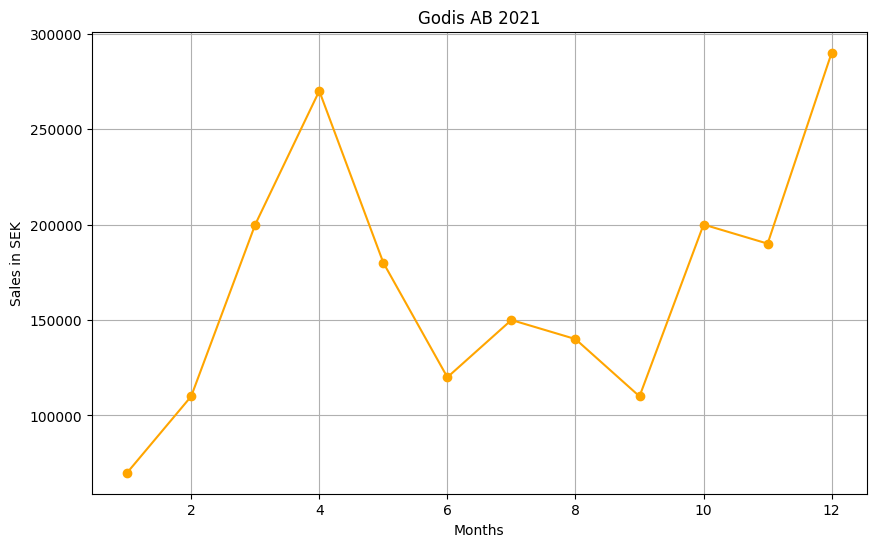

In [8]:
# Line plot for 2021
plt.figure(figsize=(10, 6))
plt.plot(df['Manad'], df['2021'], marker='o', color='orange')
plt.xlabel('Months')
plt.ylabel('Sales in SEK')
plt.title('Godis AB 2021')
plt.grid(True)
plt.show()


#### c. Bar Graph for the Year 2020


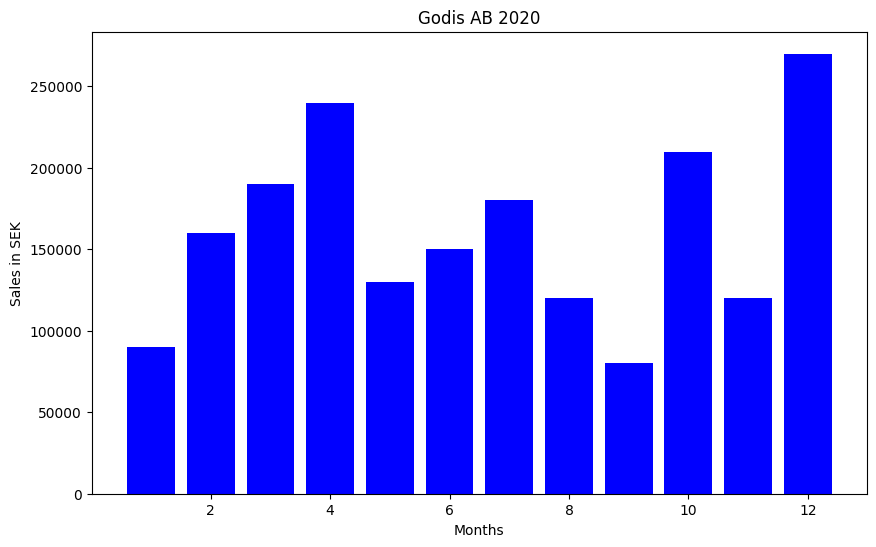

In [9]:
# Bar graph for 2020
plt.figure(figsize=(10, 6))
plt.bar(df['Manad'], df['2020'], color='blue')
plt.xlabel('Months')
plt.ylabel('Sales in SEK')
plt.title('Godis AB 2020')
plt.show()


##### d. Bar Graph for the Year 2021


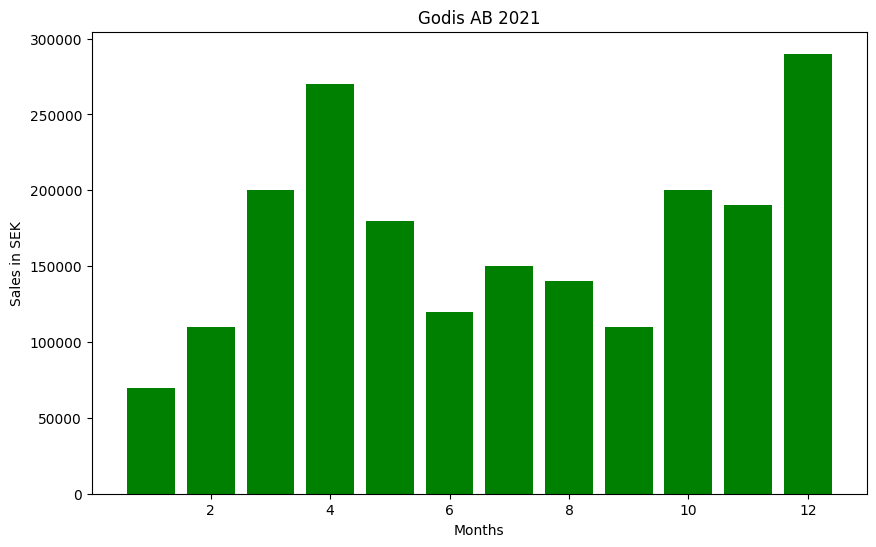

In [10]:
# Bar graph for 2021
plt.figure(figsize=(10, 6))
plt.bar(df['Manad'], df['2021'], color='green')
plt.xlabel('Months')
plt.ylabel('Sales in SEK')
plt.title('Godis AB 2021')
plt.show()


## Visualize the Sales Data with Plotly

##### a. Line Plot for the Year 2020


In [11]:
import plotly.express as px

# Line plot for 2020
fig = px.line(df, x='Manad', y='2020', markers=True, title='Godis AB 2020')
fig.update_layout(xaxis_title='Months', yaxis_title='Sales in SEK')
fig.show()


##### b. Line Plot for the Year 2021


In [12]:
# Line plot for 2021
fig = px.line(df, x='Manad', y='2021', markers=True, title='Godis AB 2021')
fig.update_layout(xaxis_title='Months', yaxis_title='Sales in SEK')
fig.show()


#### c. Bar Graph for the Year 2020


In [13]:
# Bar graph for 2020
fig = px.bar(df, x='Manad', y='2020', title='Godis AB 2020')
fig.update_layout(xaxis_title='Months', yaxis_title='Sales in SEK')
fig.show()


##### d. Bar Graph for the Year 2021


In [14]:
# Bar graph for 2021
fig = px.bar(df, x='Manad', y='2021', title='Godis AB 2021')
fig.update_layout(xaxis_title='Months', yaxis_title='Sales in SEK')
fig.show()


# Dash

In [1]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load the data
file_path = 'godisAB_forsaljning.csv'
df = pd.read_csv(file_path)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app with inline CSS to set the heading color to white
app.layout = html.Div([
    html.H1('Godis AB Sales Data', style={'color': 'white'}),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in ['2020', '2021']],
        value='2020'
    ),
    html.Div([
        html.Button('Line Graph', id='line-button', n_clicks=0),
        html.Button('Bar Graph', id='bar-button', n_clicks=0)
    ]),
    dcc.Graph(id='sales-graph')
], style={'backgroundColor': 'black'})  # Optional: Change background to black

# Define the callback to update the graph
@app.callback(
    Output('sales-graph', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('line-button', 'n_clicks'),
     Input('bar-button', 'n_clicks')]
)
def update_graph(selected_year, line_clicks, bar_clicks):
    graph_type = 'line' if line_clicks >= bar_clicks else 'bar'
    
    if graph_type == 'line':
        fig = px.line(df, x='Manad', y=selected_year, markers=True, title=f'Godis AB {selected_year}')
    else:
        fig = px.bar(df, x='Manad', y=selected_year, title=f'Godis AB {selected_year}')
    
    fig.update_layout(xaxis_title='Months', yaxis_title='Sales in SEK')
    return fig

# Run the app inside the Jupyter Notebook
if __name__ == '__main__':
    app.run_server(debug=True)

